# Jupyter Notebooks Revisited

You've already used Jupyter Notebooks extensivelly in ASTR 300. That's why we initially focused on writing some Python code _outside_ Jupyter. Python is a general-purpose programming lanugahe; it's not tied to notebooks!

For the rest of this course, the notebook will be our primary tool of choice. So let's recap some of what you've seen in ASTR 300, and learn a few new useful tips:

* Why Notebooks?
* Jupyter tips and tricks
* Jupyter Widgets: Making analysis interactive.


## Why Notebooks?

A piece of code (a program, a script) is only a _part_ of your research (analysis) work. There are also:
* Writings about project goals and ideas
* Explanatory code documentation
* Results
* Visualization of the results (plots)
* Interpretation of the results (a write-up)

All these evolve as the project goes forward (new ideas, new code, new results, new plots...). You organize all of these by ***keeping notes*** (for example, in a [_lab notebook_](https://en.wikipedia.org/wiki/Lab_notebook)).

## Jupyter: The next generation "Lab Notebook" (and more)

Jupyter weaves all these aspects together, into one, executable, tightly coupled, unit -- a ***Jupyter notebook***.

A notebook is the entry point into your research. It should gives you (or other readers) an overview of the goals, the code involved, the results and the plots. It will evolve with your research, morphing into the final analysis as you approach your goal. And sometimes, the writeup is the notebook itself (so-called _executable papers_)!

Bonus: with git, you can record the evolution of your research (and also collaborate, try out different approaches, revert if they don't work, etc.).

### "Literate Computing"

From http://blog.fperez.org/2013/04/literate-computing-and-computational.html

<blockquote>... [we] refer to the worfklow exposed by these kinds of computational notebooks (not just IPython, but also Sage, Mathematica and others), as "literate computing": it is the weaving of a narrative directly into a live computation, interleaving text with code and results to construct a complete piece that relies equally on the textual explanations and the computational components.</blockquote>

-- Fernando Perez, the creator of IPython/Jupyter

## Notebooks vs. Python programs/modules/scripts

Notebooks are primarily meant to:
* Enable fast, interactive, exploration (run some code, plot the result, change the code, etc.), and then...
* Weave together, into a coherent (readable) whole, various pieces of code/data/results and text so the logic and the result of the research can be understood.

Notebooks are __not__ a replacement for writing (Python) modules or programs and scripts. In particular, you cannot (should not) include one notebook into other notebooks.

When to use one or the other? Look at __reusability__ and __complexity__:
* ***Reusability***: If there's a function in your notebook that you want to call from a different notebok (or an alltogether different project), move it into a Python module.
* ***Complexity***: If your notebooks are flush with long complex functions (or classes), if you keep having to scroll past long chunks of code to get to the results or plots, it's likely you want to move some of that code into a module.

I find it helps to think of a notebook as a "paper in progress"; just as you wouldn't print out your entire analysis code in the middle of the paper, you don't want it to clutter the notebook too much either. Keep the short, project-specific functions in a notebook; move the rest to separate modules.

## Typical Research/Analysis Workflow

1. Write a brief explanation about what you're trying to do, and your chosen approach (the goal and hypothesis).
1. Write some code to implement the analysis, look at the plots, modify your approach, try again...
1. When you've made some tangible progress (e.g., resolved one piece of analysis), go back and clean up your notebook.
  1. **Refactor**: Rework the code to reduce duplication, moving some of it into a separate module (remember: look at reusability and complexity).
  1. **Document**: Enhance the documentation
  1. **Explain**: Write a longer narrative about what you've done, so that the notebook can almost be read by someone not intimately familiar with the work.
1. Go back to #1 until your entire project is done!

## Jupyter Tips and Tricks

Inspired in part by https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

### Keyboard Shortcuts

Keyboard shortcuts can tremendously speed up your work

The notebook has two _modes_: the `command` mode and the `edit` mode. The `command` mode allows you to navigate between cells within a notebook. The `edit` mode is used to edit a specific cell.

* Mode changes and cell execution:
  * `Enter`: Enter edit mode
  * `Esc`: Leave edit mode
  * `Shift` + `Enter`: Run cell

Tip: In command mode, the border around the selected cell is blue; in edit mode it's green.

* Some command mode shortcuts
  * `a`: Create a new cell _above_ the current one
  * `b`: Create a new cell _below_ the current one
  * `m`: Change cell type to Markdown
  * `y`: Change cell type to Code
  * `c`: Copy selected cell(s)
  * `x`: Cut selected cell(s)
  * `v`: Paste selected cell(s)
  * `d` `d`: Delete selected cell(s)
  * `z`: Undo cell deletion


* Some edit mode shortcuts:
  * `Tab`: Try to auto-complete the word you started typing.
  * `Shift` + `Tab`: Show documentation for what you've just typed in.

For more, check `Help > Keyboard Shurtcuts` (or press 'h' while in command mode)

## Documentation

Look inside the `Help` menu for pointers to documentation.

Note that you will find not only documentation about Jupyter, but about key Python libraries as well (`numpy`, `scipy`, `pandas`, etc.)

You can also get _online help_ by appending a question mark, `?`, to any Python object (or function, variable, etc.).

In [ ]:
list??

## Plotting

The de-facto Python standard for plotting is `matplotlib`. To have the matplotlib plots embedded in your Jupyter notebooks, run:
```python
%matplotlib inline
```
somewhere near the top of your notebook.

In [ ]:
# Code snippet from https://matplotlib.org/gallery/shapes_and_collections/scatter.html
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

## IPython Magics

This was one example of functions called ___IPython Magics___.

You can think of these as extensions to Python designed to make interactive data analysis in environments like the notebook easier.

If they refer to a single line, they begin with a `%` (the percent sign). If they refer to the entire cell, they begin with a `%%` (two percent signs).

In [ ]:
# Listing all magic commands

%lsmagic

Getting help by appending a `?` works for the magics as well.

In [ ]:
%mkdir?

## Useful Magics: `%timeit` - Time execution of a Python statement or expression

By prefixing an expression with `%timeit`, you can measure how long it takes to execute.

In [ ]:
%timeit a = 1 + 1

In [ ]:
a=1+1

In [ ]:
%%timeit

# Example: Loops & lists vs. numpy
x = range(1000)
y = range(1000)
z = [ x + y for x, y in zip(x, y) ]

In [ ]:
%%timeit

# Example: Loops & lists vs. numpy
x = np.arange(1000)
y = np.arange(1000)
z = x + y

## Useful Magics: `%run`

The `%run` magic will run a Python program on the command line. This can be a standalone Python program, but also a Jupyter notebook!

If it's a Jupyter notebook, `%run` will display all its outputs in a following cell, as well as bring in any variables defined in the notebook.

In [ ]:
%run scatter-plot-snippet.ipynb

In [ ]:
# hello was defined inside scatter-plot-snippet.ipynb
hello

## Useful Magics: `%%writefile`, `%pycat`, `%load`

`%%writefile` saves the cell as a file.


It's useful when:
* You're generating some test data and want to keep the "original" in the notebook.
* You're in the process of moving some notebook functions into a module, but still like to have them shown in a cell.


### Example

In [ ]:
%%writefile utils.py
import numpy as np

def gc_dist(lon1, lat1, lon2, lat2):
    """Return the great circle distance between (lon1, lat1) and (lon2, lat2)
       Both the inputs and the outputs are in degrees.
    """
    from numpy import sin, cos, arcsin, sqrt

    lon1 = np.radians(lon1); lat1 = np.radians(lat1)
    lon2 = np.radians(lon2); lat2 = np.radians(lat2)

    return np.degrees(2*arcsin(sqrt( (sin((lat1-lat2)*0.5))**2 + cos(lat1)*cos(lat2)*(sin((lon1-lon2)*0.5))**2 )));

if __name__ == "__main__":
    print(gc_dist(0, 45, 0, 90))

In [ ]:
! python ./utils.py

`%pycat` and `%load` are the opposites -- they show or load the contents of the file (with nice syntax highlighting). Useful when you want to import a piece of external code.

In [ ]:
%pycat utils.py

Note: you can also browse and edit .py files directly from Jupyter.

In [ ]:
# %load utils.py
import numpy as np

def gc_dist(lon1, lat1, lon2, lat2):
    """Return the great circle distance between (lon1, lat1) and (lon2, lat2)
       Both the inputs and the outputs are in degrees.
    """
    from numpy import sin, cos, arcsin, sqrt

    lon1 = np.radians(lon1); lat1 = np.radians(lat1)
    lon2 = np.radians(lon2); lat2 = np.radians(lat2)

    return np.degrees(2*arcsin(sqrt( (sin((lat1-lat2)*0.5))**2 + cos(lat1)*cos(lat2)*(sin((lon1-lon2)*0.5))**2 )));

if __name__ == "__main__":
    print(gc_dist(0, 45, 0, 90))

## Interacting with the shell: `!`

Shell commands can be run within Jupyter notebooks by prefixing them with `!`.

In [ ]:
! cat utils.py

You can also capture their output.

In [ ]:
theFile = 'fieldA.csv'
files = ! ls -l {theFile}

In [ ]:
print (files)

Shell calls can also [_interpolate_](https://en.wikipedia.org/wiki/String_interpolation) Python expressions, if you surround them in curly brackets, `{}`. Example:

In [ ]:
dest_dir = '/'
! echo "Here is the contents of Python variable dest_dir: '{dest_dir}'"
! echo "And here is the output of 'ls {dest_dir}':"
! ls {dest_dir + '/bin'}

Being able to call the shell is a tremendously useful capability, especially when running exploratory analyses and working with non-python programs that you need to call!

Disadvantages:
* **IPython-specific**: Only works in Jupyter/IPython. If you build functions depending on shell calls, and wish to move them into a module, you'll need to rewrite them using Python primitives.
* **Not Cross-Platform**: Makes your code less portable (e.g., can't run it on native Windows if you use Linux-specific shell commands)

Also: note that Jupyter has a full-blown terminal emulator! Go to 'File > Open', and then 'New > Terminal'. There's no need to use '!' as a replacement for a terminal.

The built-in terminal emulator is extremely useful when you're running Jupyter notebooks _remotely_ (more on that in a few weeks).

## Using LaTeX

You can use LaTeX formulae in Markdown cells by enclosing them in `$` (inline in the text) or `$$` (as a separate equation). Example:

Pythagora's theorem says that $ c = \sqrt{a^2 + b^2} $.

Our favorite inference theorem can be written as:

$$ P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)} $$


You can also mark the whole cell as containing LaTeX, using the `%%latex` magic:

In [ ]:
%%latex

The cross-product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

Note: This can only render a [subset](https://docs.mathjax.org/en/v2.5-latest/tex.html) of LaTeX implemented in MathJAX.

There are many, *many*, ***many***, more useful IPython magics and various tricks; I just cherry-picked a few to show you. Take a look at:

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

for a very nice list (with examples!).

## Jupyter Widgets: Enabling Interactive Data Analysis

Jupyter widgets enable interactive data visualization in the Jupyter notebooks.

* http://jupyter.org/widgets
* http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html

### The problem

Quite often we would like to explore how a function (or a dataset) looks like under varying conditions (e.g., change one parameter, or change some aspect of the visualization).

Given what we know so far, we would do that by changing a parameter and re-evaluating the cell:

In [2]:
def f(x):
    return 2*x

f(10)

20

That's tedious. Despair not, for there ***is*** a better way!

### Introducing IPython Widgets

Documentation: http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html

In [14]:
from ipywidgets import interact

interact(f, x=(-3, 3, 0.1))

interactive(children=(FloatSlider(value=0.0, description='x', max=3.0, min=-3.0), Output()), _dom_classes=('wi…

<function __main__.f>

### Multiple arguments

In [5]:
def g(x, y):
    return "The result of {}*{} is {}".format(x, y, x*y)

interact(g, x=3, y=10)

interactive(children=(IntSlider(value=3, description='x', max=9, min=-3), IntSlider(value=10, description='y',…

<function __main__.g>

### A more interesting example: Interactive Plotting

In [10]:
# Code snippet from https://matplotlib.org/examples/pylab_examples/contour_demo.html
# You can update this example using scipy.stats.multivariate_normal.pdf
def double_gauss(mu1_x=0, mu1_y=0, mu2_x=1, mu2_y=1):
    import matplotlib
    import numpy as np
    import matplotlib.mlab as mlab
    import matplotlib.pyplot as plt

    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'

    delta = 0.025
    x = np.arange(-3.0, 3.0, delta)
    y = np.arange(-2.0, 2.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, mu1_x, mu1_y)
    Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, mu2_x, mu2_y)
    # difference of Gaussians
    Z = 10.0 * (Z2 - Z1)

    # Create a simple contour plot with labels using default colors.  The
    # inline argument to clabel will control whether the labels are draw
    # over the line segments of the contour, removing the lines beneath
    # the label
    plt.figure()
    CS = plt.contour(X, Y, Z)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Simplest default with labels')

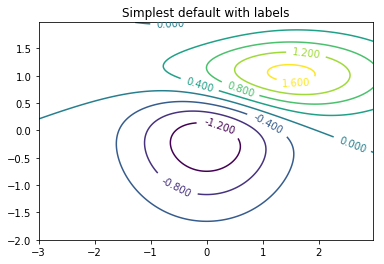

In [13]:
double_gauss()

### Interactive visualiation

In [12]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [15]:
interact(double_gauss, mu1_x=(-3, 3, 0.1), mu1_y=(-3, 3, 0.1), mu2_x=(-3, 3, .1), mu2_y=(-3, 3, .1), 
         continuous_update=False)

interactive(children=(FloatSlider(value=0.0, description='mu1_x', max=3.0, min=-3.0), FloatSlider(value=0.0, d…

<function __main__.double_gauss>

## Create a widget that plots a sine wave where the phase of the sine wave is controlled by a slider

### What if we want to fix one argument?

Wrap it in `ipytidgets.fixed()`, as follows:

In [17]:
from ipywidgets import interact, fixed

def g(x, y):
    return x*y

interact(g, x=10, y=fixed(10))

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.g>

### Further reading

These are just the simplest widgets you could construct; for more, see the [complete user guide](http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html). Another excellent place to start is the [Jupyter Widgets Tutorial](https://github.com/jupyter-widgets/tutorial).

To further wet your appetite, look at the widgets available at http://jupyter.org/widgets.

In [18]:
# Note: you need to have ipyvolume installed for this to work!
#     conda install -c defaults -c conda-forge ipyvolume
# pip install ipywidgets==7.4

import ipyvolume as ipv
x, y, z, u, v = ipv.examples.klein_bottle(draw=False)
ipv.figure()
m = ipv.plot_mesh(x, y, z, wireframe=False)
ipv.squarelim()
ipv.show()

In [19]:
# Note: you need to have ipyleaflet installed for this to work!
#    conda install -c defaults -c conda-forge ipyleaflet
from ipyleaflet import Map

Map(center=[47.653702, -122.311366], zoom=50)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [20]:
import visutils

g, gr = visutils.load_and_prepare_cmd('fieldA.csv')
visutils.interactive_hess(g, gr)

interactive(children=(IntSlider(value=100, description='n', max=300, min=50), Output()), _dom_classes=('widget…

### A note about reloading modules

Imagine the following scenario. You're working in a notebook, with a module for your utilities named `utils.py`. You use the code from the module in the usual way, e.g.:

```python
import utils
utils.foo()
```

You then add a new function to `utils.py`, named `bar()`. When you re-evaluate the cell, you'd expect this:

```python
import utils
utils.bar()
```

to just work, right? Except that it doesn't -- you're greeted by an `AttributeError: module 'utils' has no attribute 'bar'`.

The issue here is that Python loads modules from files only the first time it encounters the `import` statement; in subsequent statements, it re-uses what it already has in memory. Therefore, your modifications won't be seen until Python (your Jupyter Notebook) is restarted.

There's a way to get around this, by using the `importlib.reload()` function to force a reload of a specific module. So if we modify the example above as follows:
```python
import utils

from importlib import reload
reload(utils)

utils.bar()
```

it will work.